In [76]:
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import *
import os
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir(r"C:\Users\Harshit\Desktop\amazon case_study")

In [4]:
os.getcwd()

'C:\\Users\\Harshit\\Desktop\\amazon case_study'

In [5]:
spark=SparkSession.builder.appName("spark").getOrCreate()

In [6]:
emptyRDD = spark.sparkContext.emptyRDD()
print(emptyRDD)

EmptyRDD[0] at emptyRDD at <unknown>:0


In [7]:
from pyspark.sql.types import StructType,StructField, StringType
schema = StructType([
  StructField('Order ID', StringType(), True),
  StructField('Product', StringType(), True),
  StructField('Quantity Ordered', StringType(), True),
  StructField('Price Each', StringType(), True),
  StructField('Order Date', StringType(), True),
  StructField('Purchase Address', StringType(), True)
  ])

In [8]:
schema

StructType([StructField('Order ID', StringType(), True), StructField('Product', StringType(), True), StructField('Quantity Ordered', StringType(), True), StructField('Price Each', StringType(), True), StructField('Order Date', StringType(), True), StructField('Purchase Address', StringType(), True)])

In [9]:
data = spark.createDataFrame(data = emptyRDD,
                             schema = schema)

In [10]:
data

DataFrame[Order ID: string, Product: string, Quantity Ordered: string, Price Each: string, Order Date: string, Purchase Address: string]

In [11]:
for i in os.listdir():
    dataset=spark.read.csv(i,header=True,inferSchema=True)
    data=data.union(dataset)

In [12]:
data

DataFrame[Order ID: string, Product: string, Quantity Ordered: string, Price Each: string, Order Date: string, Purchase Address: string]

In [14]:
data.show()

+--------+--------------------+----------------+----------+--------------+--------------------+
|Order ID|             Product|Quantity Ordered|Price Each|    Order Date|    Purchase Address|
+--------+--------------------+----------------+----------+--------------+--------------------+
|  176558|USB-C Charging Cable|               2|     11.95|04/19/19 08:46|917 1st St, Dalla...|
|    null|                null|            null|      null|          null|                null|
|  176559|Bose SoundSport H...|               1|     99.99|04/07/19 22:30|682 Chestnut St, ...|
|  176560|        Google Phone|               1|     600.0|04/12/19 14:38|669 Spruce St, Lo...|
|  176560|    Wired Headphones|               1|     11.99|04/12/19 14:38|669 Spruce St, Lo...|
|  176561|    Wired Headphones|               1|     11.99|04/30/19 09:27|333 8th St, Los A...|
|  176562|USB-C Charging Cable|               1|     11.95|04/29/19 13:03|381 Wilson St, Sa...|
|  176563|Bose SoundSport H...|         

In [41]:
data1=data.toPandas()

In [42]:
data1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700.0,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700.0,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [43]:
data1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [44]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [45]:
data1["Price Each"]=data1["Price Each"].astype("float")

In [54]:
data1["Quantity Ordered"]=data1["Quantity Ordered"].astype("int")

C:\Users\Harshit\AppData\Local\Temp\ipykernel_23248\1097031624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Quantity Ordered"]=data1["Quantity Ordered"].astype("int")


In [55]:
data1.isnull().sum()/len(data1)*100

Order ID            0.0
Product             0.0
Quantity Ordered    0.0
Price Each          0.0
Order Date          0.0
Purchase Address    0.0
dtype: float64

In [49]:
data1.loc[data1["Quantity Ordered"].isnull()==True]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,None,None,None,NaN,None,None
356,None,None,None,NaN,None,None
519,None,Product,None,NaN,Order Date,Purchase Address
735,None,None,None,NaN,None,None
1149,None,Product,None,NaN,Order Date,Purchase Address
...,...,...,...,...,...,...
186548,None,None,None,NaN,None,None
186563,None,Product,None,NaN,Order Date,Purchase Address
186632,None,Product,None,NaN,Order Date,Purchase Address
186738,None,Product,None,NaN,Order Date,Purchase Address


In [52]:
data1=data1.dropna()

In [53]:
data1.shape

(185950, 6)

In [24]:
data1.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [25]:
data1.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [56]:
data1.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int32(1), object(4)
memory usage: 9.2+ MB


In [58]:
data1["Order Date"]=pd.to_datetime(data1["Order Date"])

C:\Users\Harshit\AppData\Local\Temp\ipykernel_23248\1967266874.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data1["Order Date"]=pd.to_datetime(data1["Order Date"])
C:\Users\Harshit\AppData\Local\Temp\ipykernel_23248\1967266874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Order Date"]=pd.to_datetime(data1["Order Date"])


In [59]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 9.2+ MB


In [ ]:
# Maximun Likelihood advertisement[We have to opt three consecutive dates]

In [65]:
data1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,revenue
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99


In [64]:
data1["revenue"]=data1["Quantity Ordered"]*data1["Price Each"]

In [66]:
data1['Month'] = data1['Order Date'].dt.month

In [68]:
data1["Days"]=data1["Order Date"].dt.day

In [69]:
data1["Hours"]=data1["Order Date"].dt.hour

In [72]:
data1["dayname"]=data1["Order Date"].dt.day_name()

In [78]:
data1["month_name"]=data1["Order Date"].dt.month_name()

In [79]:
data1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,revenue,Month,Days,Hours,dayname,month_name
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,19,8,Friday,April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,7,22,Sunday,April
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,12,14,Friday,April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,12,14,Friday,April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,30,9,Tuesday,April


In [80]:
data1.groupby("month_name")["revenue"].sum()

month_name
April        3390670.24
August       2244467.88
December     4613443.34
February     2202022.42
January      1822256.73
July         2647775.76
June         2577802.26
March        2807100.38
May          3152606.75
November     3199603.20
October      3736726.88
September    2097560.13
Name: revenue, dtype: float64

In [104]:
data_sales=pd.DataFrame(data1.groupby("month_name")[["revenue","Quantity Ordered"]].sum())

In [105]:
data_sales.reset_index(inplace=True)

In [106]:
data_sales

,month_name,revenue,Quantity Ordered
0,April,3390670.24,20558
1,August,2244467.88,13448
2,December,4613443.34,28114
3,February,2202022.42,13449
4,January,1822256.73,10903
5,July,2647775.76,16072
6,June,2577802.26,15253
7,March,2807100.38,17005
8,May,3152606.75,18667
9,November,3199603.20,19798


In [107]:
color_names=["r","orange","lightblue","g","darkorange","maroon","olive","yellow","darkcyan","magenta","cyan","b"]

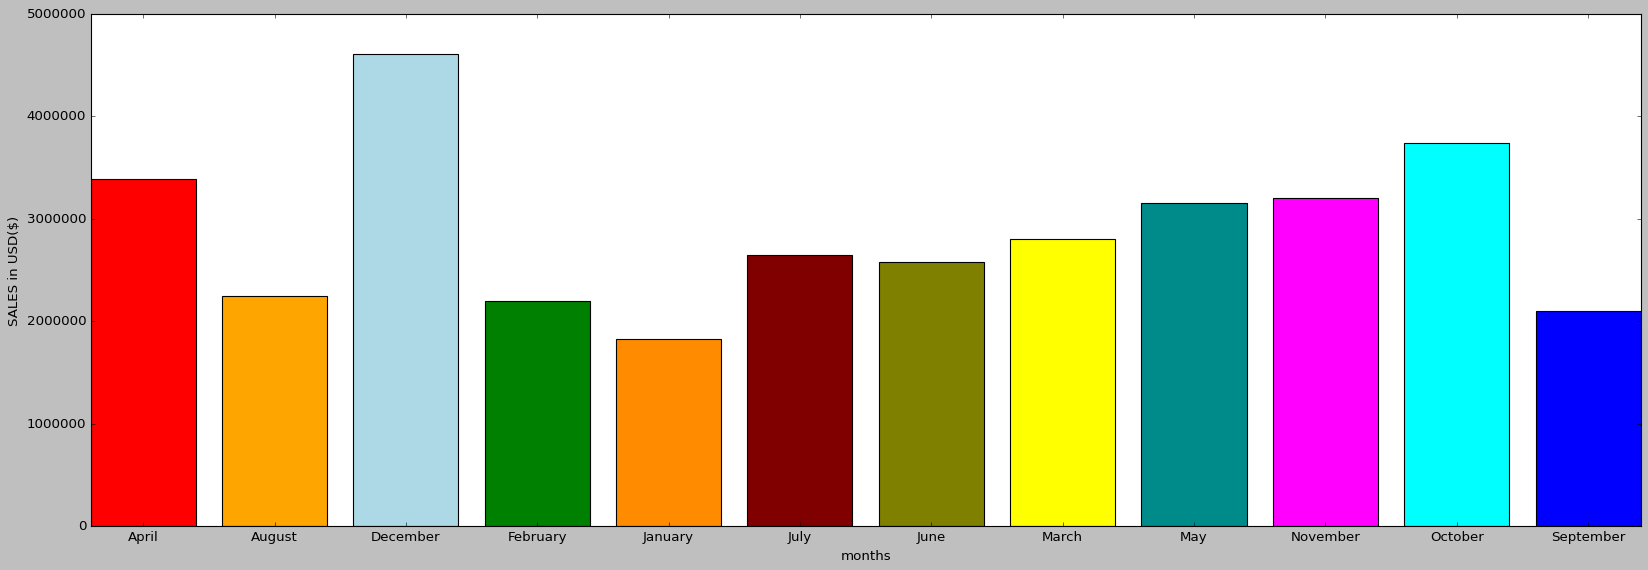

In [108]:
month_sales=plt.figure(figsize=(25,8))
x=data_sales["month_name"]
y=data_sales["revenue"]
plt.bar(x,y,color=color_names)
plt.xticks(x)
plt.ylabel("SALES in USD($)")
plt.xlabel("months")
plt.show()

In [94]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [109]:
plt.style.use("seaborn-v0_8-bright")

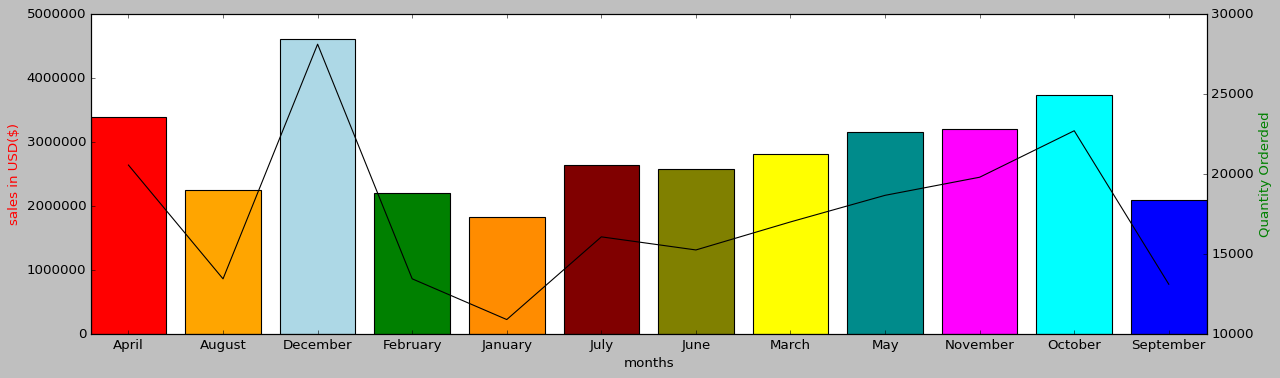

In [113]:
fig, ax1 = plt.subplots(figsize=(18,5))
x=data_sales["month_name"]
y=data_sales["revenue"]
ax2 = ax1.twinx()
ax1.bar(x,y,color=color_names)
ax2.plot(x,data_sales["Quantity Ordered"], color="black")
plt.xticks(x)
ax1.set_xlabel('months')
ax1.set_ylabel('sales in USD($)', color='r')
ax2.set_ylabel('Quantity Orderded', color="g")
plt.show()

In [117]:
peak_day=pd.DataFrame(data1.groupby("Days")[["revenue","Quantity Ordered"]].sum())

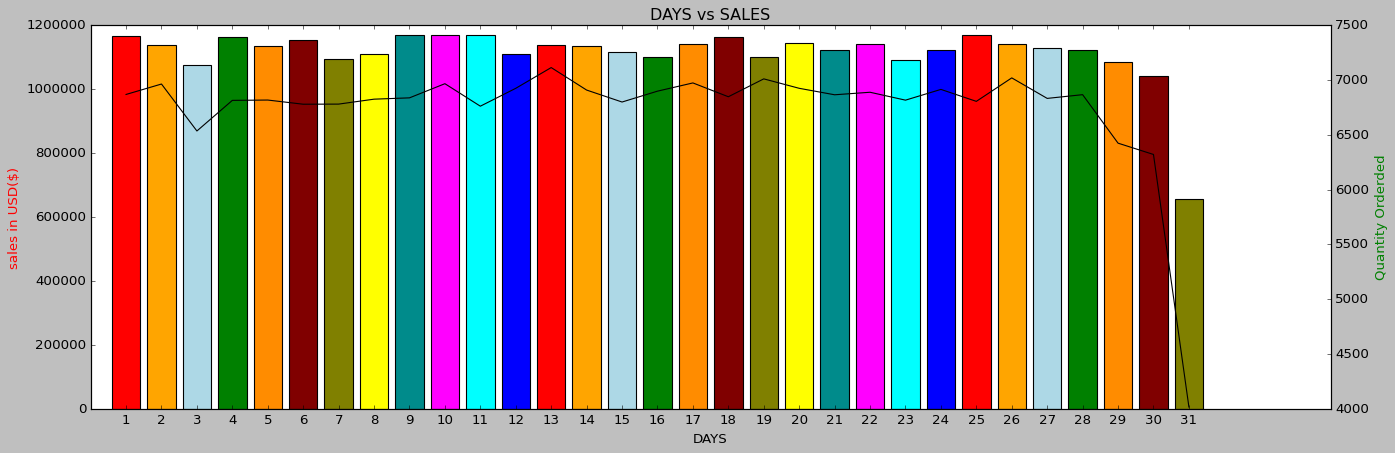

In [118]:
color_names=["r","orange","lightblue","g","darkorange","maroon","olive","yellow","darkcyan","magenta","cyan","b"]
fig, ax1 = plt.subplots(figsize=(20,6))
x=range(1,32)
y=peak_day["revenue"]
ax2 = ax1.twinx()
ax1.bar(x,y,color=color_names)
ax2.plot(x,peak_day["Quantity Ordered"], color="k")
plt.xticks(x)
plt.title("DAYS vs SALES")
ax1.set_xlabel('DAYS')
ax1.set_ylabel('sales in USD($)', color='r')
ax2.set_ylabel('Quantity Orderded', color="g")
plt.show()

In [121]:
peak_hour=pd.DataFrame(data1.groupby("Hours")[["revenue","Quantity Ordered"]].sum())

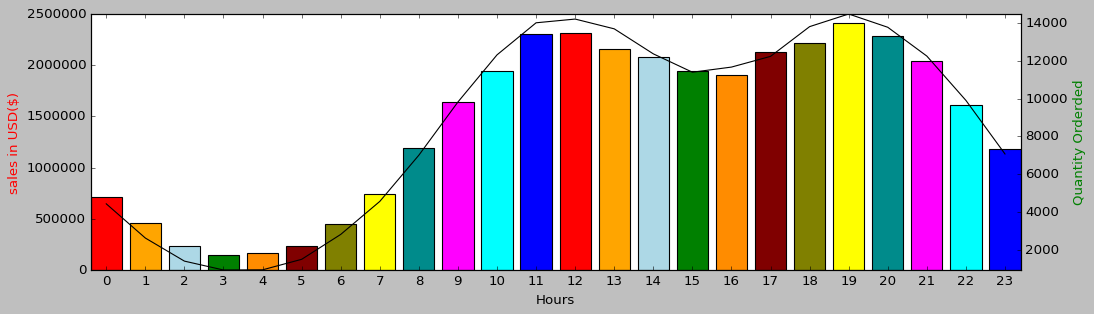

In [124]:
fig, ax1 = plt.subplots(figsize=(15,4))
x=range(0,24)
y=peak_hour["revenue"]
ax2 = ax1.twinx()
ax1.bar(x,y,color=color_names)
ax2.plot(x,peak_hour["Quantity Ordered"], color="k")
plt.xticks(x)
ax1.set_xlabel('Hours')
ax1.set_ylabel('sales in USD($)', color='r')
ax2.set_ylabel('Quantity Orderded', color="g")
plt.axis("tight")
plt.show()

In [1]:
# Supply Chain Optimization

In [142]:
data1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,revenue,Month,Days,Hours,dayname,month_name
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,19,8,Friday,April
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,7,22,Sunday,April
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,12,14,Friday,April
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,12,14,Friday,April
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,30,9,Tuesday,April


In [141]:
data1["Purchase Address"][1].split(",")[1]+data1["Purchase Address"][1].split(",")[2][0:3]

' Boston MA'

In [139]:
data1.reset_index(drop=True,inplace=True)

In [143]:
data1["City_Sales"]=data1["Purchase Address"].apply (lambda x: x.split(",")[1]+x.split(",")[2][0:3])

In [144]:
data1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,revenue,Month,Days,Hours,dayname,month_name,City_Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,19,8,Friday,April,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,7,22,Sunday,April,Boston MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,12,14,Friday,April,Los Angeles CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,12,14,Friday,April,Los Angeles CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,30,9,Tuesday,April,Los Angeles CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,9,17,20,Tuesday,September,Los Angeles CA
185946,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9,1,16,Sunday,September,San Francisco CA
185947,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,9,23,7,Monday,September,San Francisco CA
185948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,9,19,17,Thursday,September,San Francisco CA


In [148]:
city_sales=pd.DataFrame(data1.groupby("City_Sales")[["revenue","Quantity Ordered"]].sum())

In [153]:
city_sales.reset_index(inplace=True)

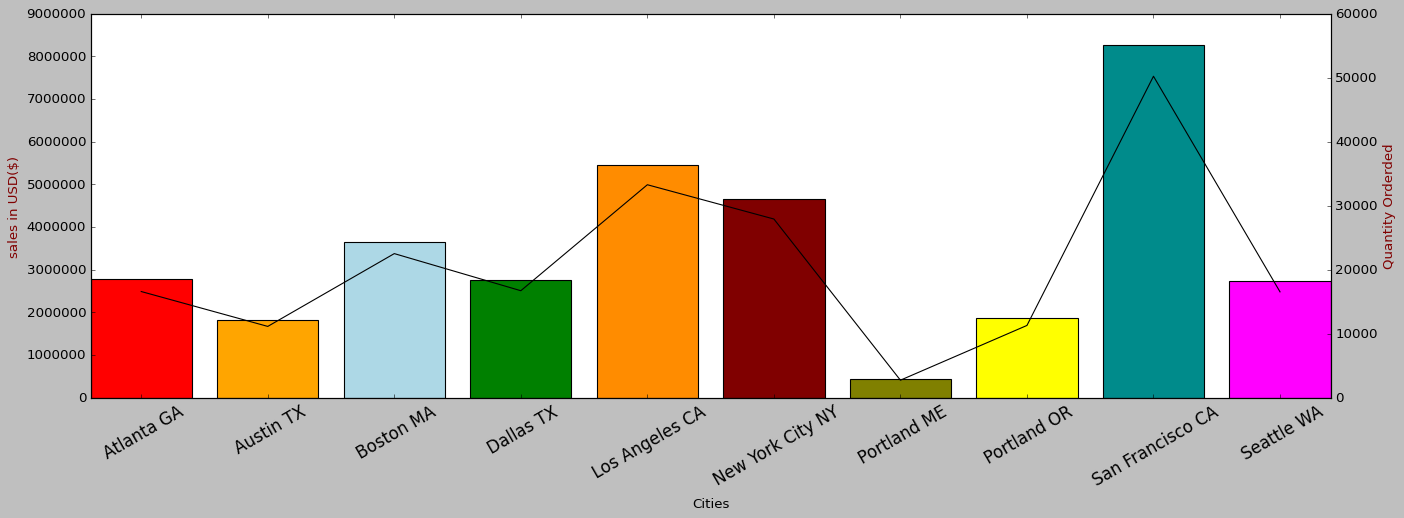

In [154]:
fig, ax1 = plt.subplots(figsize=(20,6))
x=city_sales["City_Sales"]
y=city_sales["revenue"]
ax2 = ax1.twinx()
ax1.bar(x,y,color=color_names)
ax2.plot(x,city_sales["Quantity Ordered"], color="black")
plt.xticks(x,rotation="horizontal")
ax1.set_xlabel('Cities')
ax1.set_xticklabels(city_sales["City_Sales"], rotation=30, size=15,color="black")
ax1.set_ylabel('sales in USD($)', color='maroon')
ax2.set_ylabel('Quantity Orderded', color="maroon")
plt.show()

In [157]:
pd.set_option("display.max_rows",None)

In [161]:
data1.groupby(["City_Sales","Product"])["revenue"].sum()

City_Sales         Product                   
 Atlanta GA        20in Monitor                    37616.58
                   27in 4K Gaming Monitor         192265.07
                   27in FHD Monitor                88194.12
                   34in Ultrawide Monitor         183155.18
                   AA Batteries (4-pack)            8421.12
                   AAA Batteries (4-pack)           7053.41
                   Apple Airpods Headphones       189900.00
                   Bose SoundSport Headphones     108389.16
                   Flatscreen TV                  122100.00
                   Google Phone                   270600.00
                   LG Dryer                        35400.00
                   LG Washing Machine              31200.00
                   Lightning Charging Cable        28091.05
                   Macbook Pro Laptop             644300.00
                   ThinkPad Laptop                356996.43
                   USB-C Charging Cable            228

In [162]:
a=data1.groupby(["City_Sales","Product"]).agg({"revenue":sum})

In [179]:
g = a["revenue"].groupby("City_Sales",group_keys=False)
res = g.apply(lambda x: x.sort_values(ascending=False).head(5))

In [180]:
top_10=pd.DataFrame(res)

In [181]:
top_10.reset_index(inplace=True)

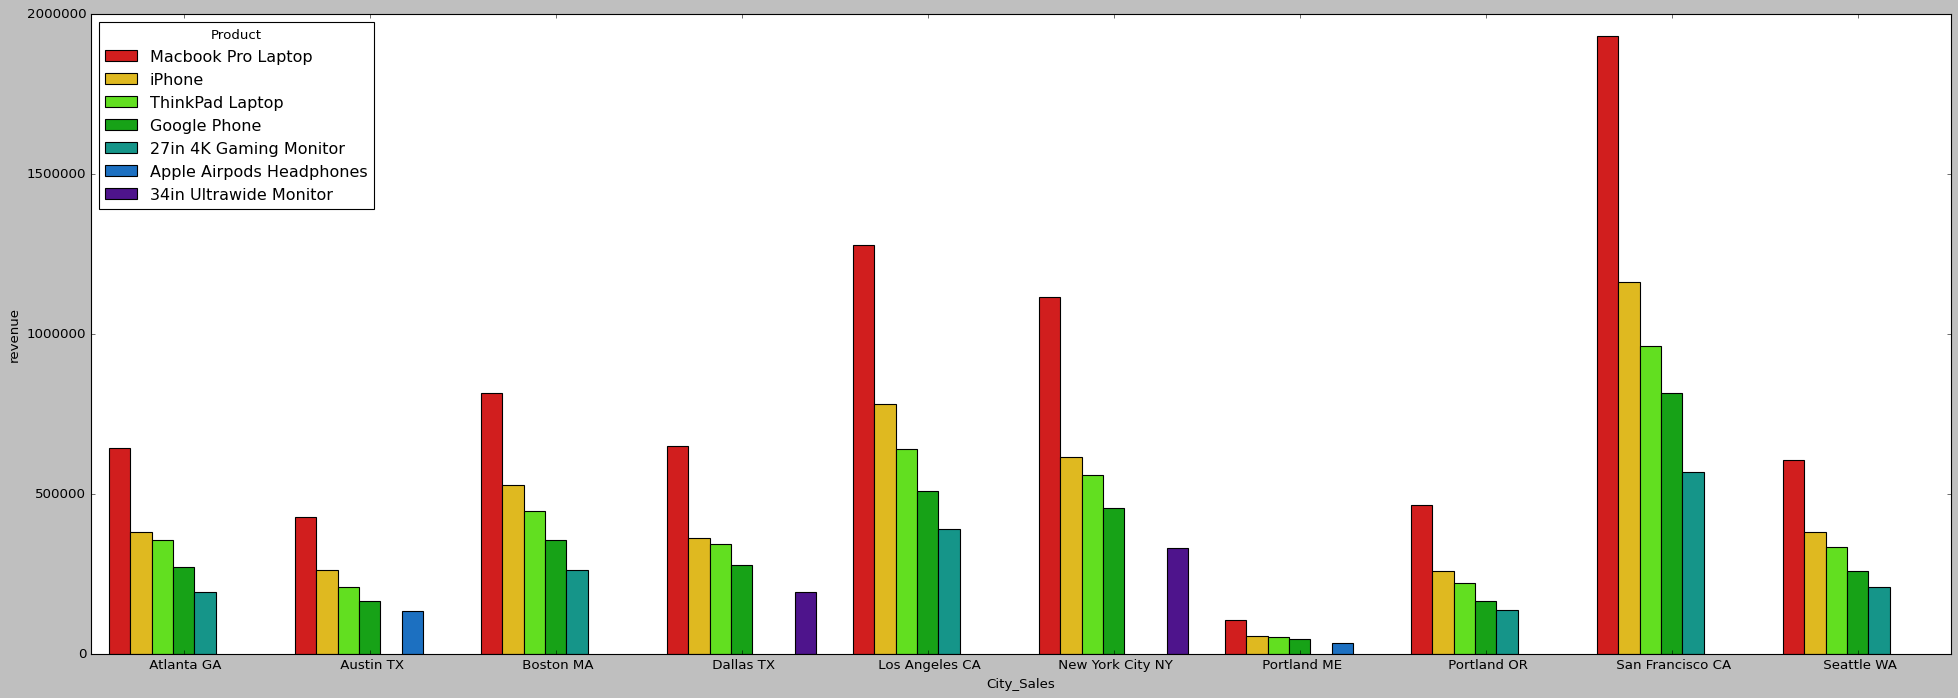

In [182]:
plt.figure(figsize=(30,10))
sns.barplot(x=top_10["City_Sales"],y=top_10["revenue"],hue=top_10["Product"],palette="nipy_spectral_r")
plt.show()

In [191]:
data_rec=data1[data1['Order ID'].duplicated(keep=False)]

In [192]:
df_asso=data_rec[["Order ID","Product"]]

In [194]:
df_asso["grouped"]=df_asso.groupby('Order ID')['Product'].transform(lambda x : ",".join(x))

In [195]:
df_asso.head(10)

,Order ID,Product,grouped
2,176560,Google Phone,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,"Google Phone,Wired Headphones"
17,176574,Google Phone,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,"Bose SoundSport Headphones,Bose SoundSport Hea..."
30,176585,Bose SoundSport Headphones,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,AAA Batteries (4-pack),"AAA Batteries (4-pack),Google Phone"
32,176586,Google Phone,"AAA Batteries (4-pack),Google Phone"
118,176672,Lightning Charging Cable,"Lightning Charging Cable,USB-C Charging Cable"
119,176672,USB-C Charging Cable,"Lightning Charging Cable,USB-C Charging Cable"


In [196]:
df_asso_1=df_asso.drop_duplicates("Order ID")

In [199]:
df_asso_1.head(10)

,Order ID,Product,grouped
2,176560,Google Phone,"Google Phone,Wired Headphones"
17,176574,Google Phone,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,AAA Batteries (4-pack),"AAA Batteries (4-pack),Google Phone"
118,176672,Lightning Charging Cable,"Lightning Charging Cable,USB-C Charging Cable"
128,176681,Apple Airpods Headphones,"Apple Airpods Headphones,ThinkPad Laptop"
137,176689,Bose SoundSport Headphones,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
188,176739,34in Ultrawide Monitor,"34in Ultrawide Monitor,Google Phone"
224,176774,Lightning Charging Cable,"Lightning Charging Cable,USB-C Charging Cable"
232,176781,iPhone,"iPhone,Lightning Charging Cable"


In [201]:
from itertools import combinations
from collections import Counter
a=["iphone","airpods","charger","usb"]
Counter(combinations(a,3))

Counter({('iphone', 'airpods', 'charger'): 1,
         ('iphone', 'airpods', 'usb'): 1,
         ('iphone', 'charger', 'usb'): 1,
         ('airpods', 'charger', 'usb'): 1})

In [207]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_asso_1['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

In [208]:
count.most_common()

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92),
 (('Lightning Charging Cable', 'Apple Airpods Headphones'), 81),
 (('Vareebadd Phone', 'Bose SoundSport Headphones'), 80),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 77),
 (('Apple Airpods Headphones', 'Wired Headphones'), 69),
 (('Lightning Charging Cable', 'USB-C Charging Cable'), 58),
 (('Lightning Charging Cable', 'AA Batteries (4-pack)'), 55),
 (('Lightning Charging Cable', 'Lightning Charging Cable'), 54),
 (('Bose SoundSport Headphones', 'Wired Headphones'), 53),
 (('AA B